In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False  # Image is no longer writeable
    results = model.process(image)  # Make prediction
    image.flags.writeable = True  # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)  # Draw face connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)  # Draw pose connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # Draw left hand connections
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 ) 
    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 ) 
    # Draw left hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 ) 
    # Draw right hand connections  
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 ) 
    

c:\Users\Amina\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

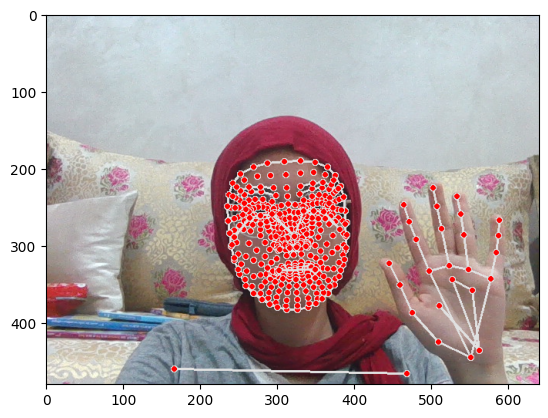

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

# Vérifiez si les landmarks de la main gauche sont détectés avant d'y accéder
if results.left_hand_landmarks:
    print("Left hand landmarks detected")
    print(len(results.left_hand_landmarks.landmark))
    results
else:
    print("Left hand landmarks not detected")

draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()  # Ajoutez plt.show() pour afficher l'image avec matplotlib


In [7]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

result_test = extract_keypoints(results)
print(result_test)
np.save('0', result_test)
np.load('0.npy')


[ 0.50327504  0.60107464 -0.87496585 ...  0.          0.
  0.        ]


array([ 0.50327504,  0.60107464, -0.87496585, ...,  0.        ,
        0.        ,  0.        ])

In [8]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Dataaaaaaaaa') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [9]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [10]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

cap.release()
cv2.destroyAllWindows()

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [12]:
label_map = {label:num for num, label in enumerate(actions)}
label_map
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
np.array(sequences).shape
np.array(labels).shape
X = np.array(sequences)
X.shape
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape

(5, 3)

In [13]:
print(label_map)

{'hello': 0, 'thanks': 1, 'iloveyou': 2}


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [15]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [16]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\Amina\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [19]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.5498 - loss: 0.9529
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.4169 - loss: 1.0194
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - categorical_accuracy: 0.4677 - loss: 1.0428
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.5303 - loss: 0.9753
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.3366 - loss: 2.9446
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.2017 - loss: 1.0132
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.4403 - loss: 1.0442
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.3933 - loss: 1.2094
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.5635 - loss: 5.9315
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.4325 - loss: 22.9645
Epoch 11/2000
3/3 ━━━━━━━━━━

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [21]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step


In [22]:
actions[np.argmax(res[4])]

'thanks'

In [23]:
actions[np.argmax(y_test[4])]

'thanks'

In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras.utils
from keras import utils as np_utils

In [25]:
model.save('action.keras')
model.save('action.h5')

In [ ]:
del model

In [26]:
model.load_weights('action.keras')

In [27]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [28]:
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[[3, 1],
        [1, 0]],

       [[3, 0],
        [0, 2]],

       [[2, 1],
        [1, 1]]], dtype=int64)

In [29]:
accuracy_score(ytrue, yhat)

0.6

In [30]:
from scipy import stats

In [31]:

colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

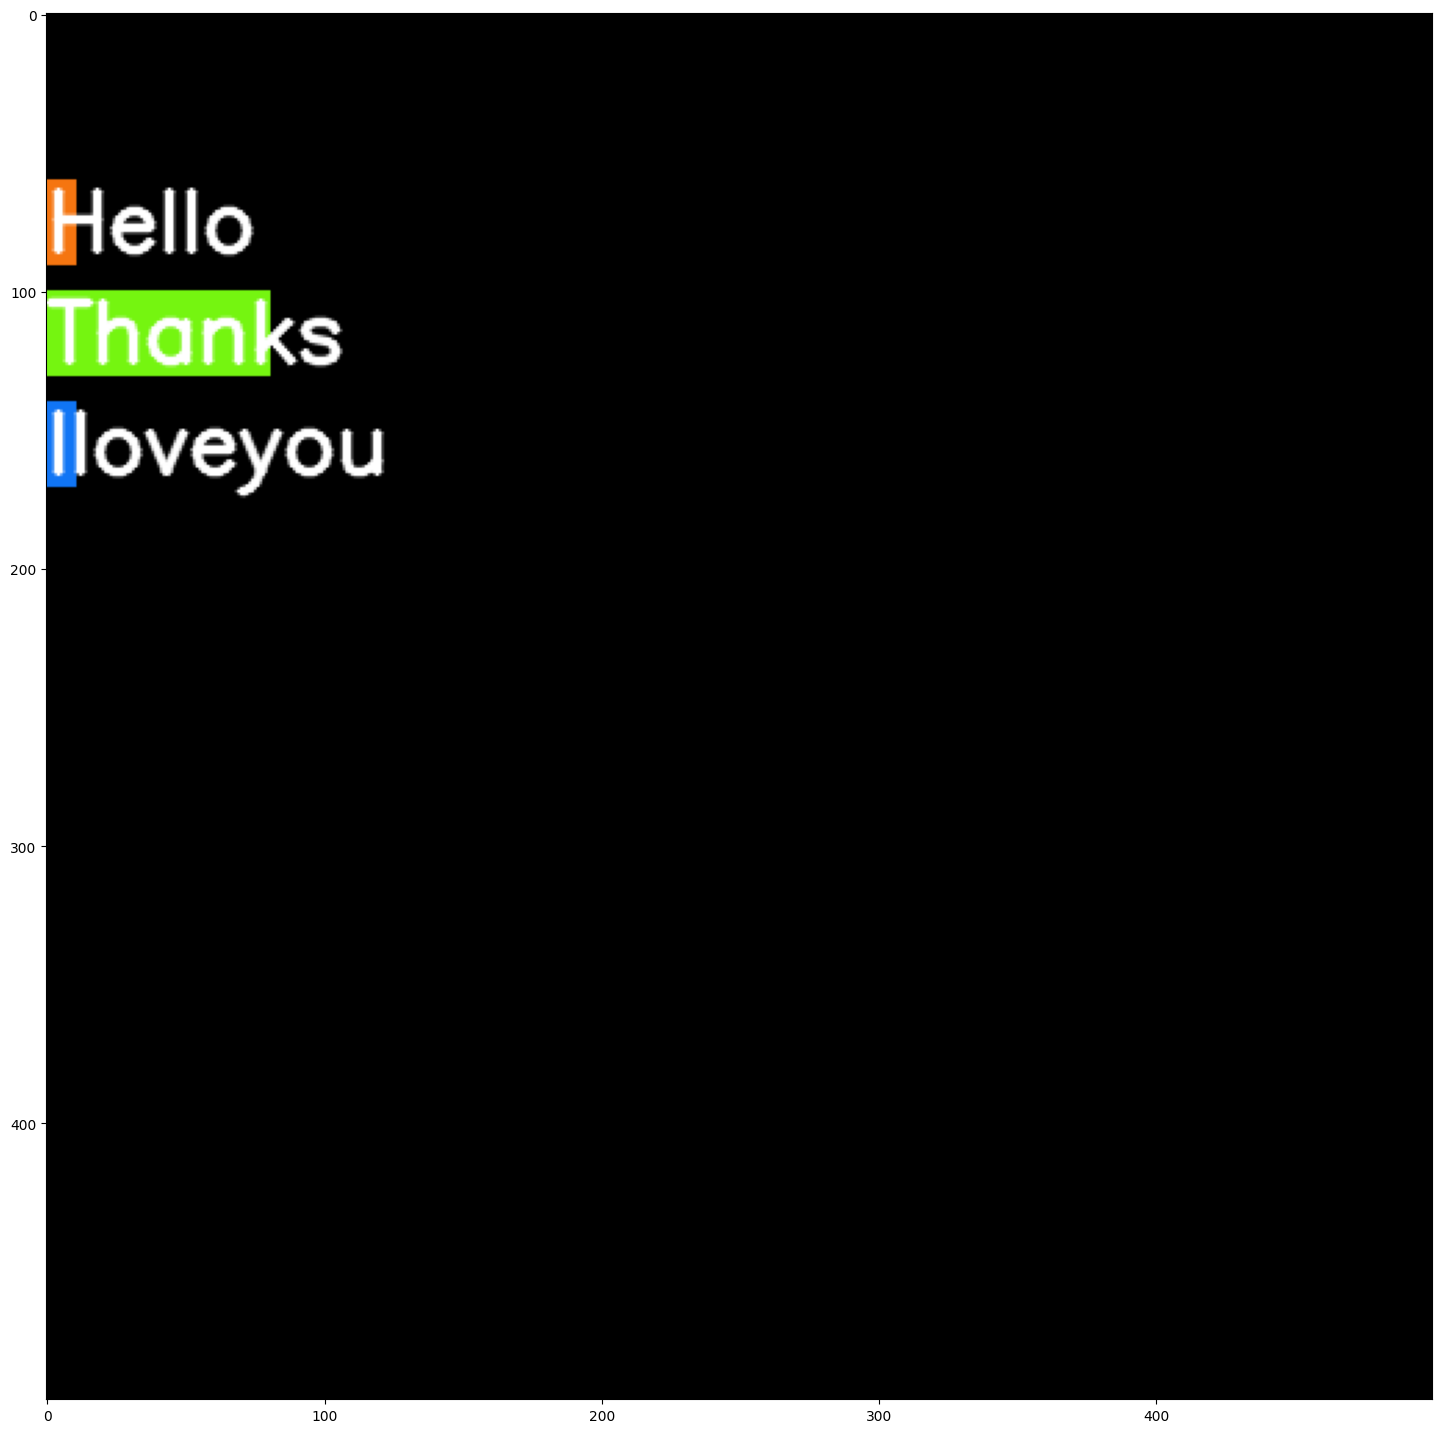

In [34]:
# Exemple d'utilisation de la fonction
res = [0.1, 0.8, 0.1]  # Exemple de résultats de prédiction
actions = ['Hello', 'Thanks', 'Iloveyou']  # Actions possibles
image = np.zeros((500, 500, 3), dtype=np.uint8)  # Image d'exemple

# Afficher l'image avec les visualisations des probabilités
plt.figure(figsize=(18, 18))
plt.imshow(prob_viz(res, actions, image, colors))
plt.show()

In [37]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

MNIST MODEL

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Charger les données
train = pd.read_csv(r'C:\Users\Amina\Downloads\archive (9)\sign_mnist_train.csv')
test = pd.read_csv(r'C:\Users\Amina\Downloads\archive (9)\sign_mnist_test.csv')

# Préparer les données d'entraînement
X_train = train.drop('label', axis=1).values.astype('float32')
y_train = train['label'].values

# Préparer les données de test
X_test = test.drop('label', axis=1).values.astype('float32')
y_test = test['label'].values

# Reshape des données pour le modèle CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalisation des données
X_train /= 255.0
X_test /= 255.0

# Conversion des labels en catégories
y_train = to_categorical(y_train, 25)
y_test = to_categorical(y_test, 25)

# Construire le modèle CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Sauvegarder le modèle
model.save('sign_language_mnist_model.keras')



c:\Users\Amina\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.3376 - loss: 2.2027 - val_accuracy: 0.8378 - val_loss: 0.5372
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.8425 - loss: 0.4696 - val_accuracy: 0.9071 - val_loss: 0.3106
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9236 - loss: 0.2196 - val_accuracy: 0.9098 - val_loss: 0.2810
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9575 - loss: 0.1264 - val_accuracy: 0.9056 - val_loss: 0.3157
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9627 - loss: 0.1081 - val_accuracy: 0.9310 - val_loss: 0.2424
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9742 - loss: 0.0776 - val_accuracy: 0.9229 - val_loss: 0.2944
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9775 - loss: 0.0651 - val_accuracy: 0.9205 - val_loss: 0.3338
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9843 - loss: 0.0487 - 

In [12]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
import time

# Initialisation de MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Charger le modèle CNN pré-entraîné
model = tf.keras.models.load_model('sign_language_mnist_model.keras')

# Dictionnaire pour mapper les prédictions aux lettres (Sign Language MNIST)
gesture_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
                10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
                19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'}

# Fonction pour extraire les landmarks et les convertir en une image de 28x28
def extract_landmarks_as_image(hand_landmarks):
    image = np.zeros((28, 28), dtype=np.float32)
    for lm in hand_landmarks.landmark:
        x, y = int(lm.x * 28), int(lm.y * 28)
        if x >= 28: x = 27
        if y >= 28: y = 27
        image[y, x] = 1.0
    return image

# Fonction pour prédire la lettre du geste à partir des landmarks
def predict_letter(image, model):
    image = np.expand_dims(image, axis=[0, -1])  # Reshape pour correspondre à l'entrée du modèle
    prediction = model.predict(image)
    return gesture_dict[np.argmax(prediction)]

# Capture vidéo
cap = cv2.VideoCapture(0)

# Variable pour stocker le texte traduit
translated_text = ""
last_capture_time = time.time()
CAPTURE_DELAY = 2  # Délai de 2 secondes avant de capturer le geste suivant

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Conversion de l'image en RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Détection des mains
    result = hands.process(image)

    # Si des mains sont détectées
    if result.multi_hand_landmarks and (time.time() - last_capture_time > CAPTURE_DELAY):
        for hand_landmarks in result.multi_hand_landmarks:
            # Dessiner les landmarks des mains
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Extraire les landmarks et les convertir en une image de 28x28
            image_landmarks = extract_landmarks_as_image(hand_landmarks)

            # Prédire la lettre du geste
            gesture = predict_letter(image_landmarks, model)

            # Ajouter le geste reconnu au texte traduit
            translated_text += gesture
            print(translated_text)

            # Mettre à jour le temps de la dernière capture
            last_capture_time = time.time()

    # Afficher le texte traduit sur l'image
    cv2.putText(frame, translated_text, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3, cv2.LINE_AA)

    # Afficher l'image
    cv2.imshow('Hand Gesture Recognition', frame)

    # Sortir de la boucle avec la touche 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer les ressources
cap.release()
cv2.destroyAllWindows()
hands.close()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
P
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
PQ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
PQP
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
PQPQ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
PQPQG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
PQPQGT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
PQPQGTH
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
PQPQGTHP
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
PQPQGTHPH


ASL DATASET

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os

# Chemins vers le dataset
train_dir = r'C:\Users\Amina\Downloads\archive (10)\asl_alphabet_train\asl_alphabet_train'
validation_dir = r'C:\Users\Amina\Downloads\archive (10)\asl_alphabet_train\asl_alphabet_train'

# Générateurs de données
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Vérification du nombre de classes
num_classes = len(train_generator.class_indices)
print(f'Number of classes: {num_classes}')  # Cela devrait inclure 'a' à 'z', 'space', 'nothing', et 'del'

# Modèle CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Utilisation de num_classes pour correspondre au générateur de données
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Sauvegarder le modèle
model.save('asl_model.h5')



Found 87000 images belonging to 29 classes.
Found 87000 images belonging to 29 classes.
Number of classes: 29
Epoch 1/10


c:\Users\Amina\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2719/2719 ━━━━━━━━━━━━━━━━━━━━ 586s 213ms/step - accuracy: 0.6427 - loss: 1.2158 - val_accuracy: 0.9808 - val_loss: 0.0620
Epoch 2/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 605s 222ms/step - accuracy: 0.9804 - loss: 0.0623 - val_accuracy: 0.9761 - val_loss: 0.0698
Epoch 3/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 601s 220ms/step - accuracy: 0.9881 - loss: 0.0373 - val_accuracy: 0.9885 - val_loss: 0.0356
Epoch 4/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 574s 211ms/step - accuracy: 0.9914 - loss: 0.0277 - val_accuracy: 0.9962 - val_loss: 0.0131
Epoch 5/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 482s 177ms/step - accuracy: 0.9926 - loss: 0.0251 - val_accuracy: 0.9983 - val_loss: 0.0067
Epoch 6/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 382s 140ms/step - accuracy: 0.9945 - loss: 0.0199 - val_accuracy: 0.9964 - val_loss: 0.0127
Epoch 7/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 376s 138ms/step - accuracy: 0.9960 - loss: 0.0147 - val_accuracy: 0.9994 - val_loss: 0.0023
Epoch 8/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 406s 149ms/step - accuracy: 0.9

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
model.save('asl_model.keras')

In [18]:

validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {validation_accuracy * 100:.2f}%')

2719/2719 ━━━━━━━━━━━━━━━━━━━━ 199s 73ms/step - accuracy: 0.9964 - loss: 0.0114
Validation accuracy: 99.65%


In [19]:
import cv2
import numpy as np
import tensorflow as tf

# Charger le modèle
model = tf.keras.models.load_model('asl_model.keras')

# Labels des classes
labels = {v: k for k, v in train_generator.class_indices.items()}  # Map class indices to class labels

# Fonction pour prédire la lettre à partir de l'image
def predict_letter(frame, model):
    img = cv2.resize(frame, (64, 64))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    return labels[class_idx]

# Capture vidéo
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Détection et prédiction
    letter = predict_letter(frame, model)

    # Affichage du résultat
    cv2.putText(frame, letter, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3, cv2.LINE_AA)
    cv2.imshow('ASL Translator', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer les ressources
cap.release()
cv2.destroyAllWindows()

c:\Users\Amina\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━

In [24]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
import time

# Initialisation de MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Charger le modèle CNN pré-entraîné
model = tf.keras.models.load_model('asl_model.h5')

# Dictionnaire pour mapper les prédictions aux lettres (ASL Alphabet)
gesture_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
                10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
                19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}

# Fonction pour extraire les landmarks et les convertir en une image de 64x64
def extract_landmarks_as_image(hand_landmarks):
    image = np.zeros((64, 64, 3), dtype=np.float32)  # Image RGB simulée avec 3 canaux
    for lm in hand_landmarks.landmark:
        x, y = int(lm.x * 64), int(lm.y * 64)
        if x >= 64: x = 63
        if y >= 64: y = 63
        image[y, x] = [1.0, 1.0, 1.0]  # Rendre l'image en RGB
    return image

# Fonction pour prédire la lettre du geste à partir des landmarks
def predict_letter(image, model):
    image = np.expand_dims(image, axis=0)  # Ajouter un axe pour le batch
    prediction = model.predict(image)
    return gesture_dict[np.argmax(prediction)]

# Capture vidéo
cap = cv2.VideoCapture(0)

# Variable pour stocker le texte traduit
translated_text = ""
last_capture_time = time.time()
CAPTURE_DELAY = 2  # Délai de 2 secondes avant de capturer le geste suivant

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Conversion de l'image en RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Détection des mains
    result = hands.process(image)

    # Si des mains sont détectées
    if result.multi_hand_landmarks and (time.time() - last_capture_time > CAPTURE_DELAY):
        for hand_landmarks in result.multi_hand_landmarks:
            # Dessiner les landmarks des mains
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Extraire les landmarks et les convertir en une image de 64x64
            image_landmarks = extract_landmarks_as_image(hand_landmarks)

            # Prédire la lettre du geste
            gesture = predict_letter(image_landmarks, model)

            # Ajouter le geste reconnu au texte traduit
            translated_text += gesture
            print(translated_text)

            # Mettre à jour le temps de la dernière capture
            last_capture_time = time.time()

    # Afficher le texte traduit sur l'image
    cv2.putText(frame, translated_text, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3, cv2.LINE_AA)

    # Afficher l'image
    cv2.imshow('Hand Gesture Recognition', frame)

    # Sortir de la boucle avec la touche 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer les ressources
cap.release()
cv2.destroyAllWindows()
hands.close()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
EE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
EEE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
EEEE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
EEEEE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
EEEEET
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
EEEEETE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
EEEEETEE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
EEEEETEEE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
EEEEETEEEE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
EEEEETEEEEN
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
EEEEETEEEENP
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
EEEEETEEEENPF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
EEEEETEEEENPFS
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
EEEEETEEEENPFSF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
EEEEETEEEENPFSFB
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
EEEEETEEEENPFSFBY
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
EEEEETEEEENPFSFBYF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
EEEEETEEEENPFSFBYFF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
EEEEETEEEENPFSFBYFFF


In [25]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
import time

# Initialisation de MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Charger le modèle CNN pré-entraîné
model = tf.keras.models.load_model('asl_model.h5')

# Dictionnaire pour mapper les prédictions aux lettres (ASL Alphabet)
gesture_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
                10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
                19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}

# Fonction pour extraire les landmarks et les convertir en une image de 64x64
def extract_landmarks_as_image(hand_landmarks):
    image = np.zeros((64, 64, 3), dtype=np.float32)  # Image RGB simulée avec 3 canaux
    for lm in hand_landmarks.landmark:
        x, y = int(lm.x * 64), int(lm.y * 64)
        if x >= 64: x = 63
        if y >= 64: y = 63
        image[y, x] = [1.0, 1.0, 1.0]  # Rendre l'image en RGB
    return image

# Fonction pour prédire la lettre du geste à partir des landmarks
def predict_letter(image, model):
    image = np.expand_dims(image, axis=0)  # Ajouter un axe pour le batch
    prediction = model.predict(image)
    return gesture_dict[np.argmax(prediction)]

# Capture vidéo
cap = cv2.VideoCapture(0)

# Variable pour stocker le texte traduit
translated_text = ""
last_capture_time = time.time()
CAPTURE_DELAY = 2  # Délai de 2 secondes avant de capturer le geste suivant

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Conversion de l'image en RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Détection des mains
    result = hands.process(image)

    # Si des mains sont détectées
    if result.multi_hand_landmarks and (time.time() - last_capture_time > CAPTURE_DELAY):
        for hand_landmarks in result.multi_hand_landmarks:
            # Dessiner les landmarks des mains
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Extraire les landmarks et les convertir en une image de 64x64
            image_landmarks = extract_landmarks_as_image(hand_landmarks)

            # Afficher l'image des landmarks pour vérifier
            cv2.imshow('Landmarks', cv2.resize(image_landmarks, (256, 256)))

            # Prédire la lettre du geste
            gesture = predict_letter(image_landmarks, model)

            # Ajouter le geste reconnu au texte traduit
            translated_text += gesture
            print(translated_text)

            # Mettre à jour le temps de la dernière capture
            last_capture_time = time.time()

    # Afficher le texte traduit sur l'image
    cv2.putText(frame, translated_text, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3, cv2.LINE_AA)

    # Afficher l'image
    cv2.imshow('Hand Gesture Recognition', frame)

    # Sortir de la boucle avec la touche 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer les ressources
cap.release()
cv2.destroyAllWindows()
hands.close()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
SF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
SFF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
SFFP
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
SFFPF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
SFFPFE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
SFFPFEF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
SFFPFEFF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
SFFPFEFFE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
SFFPFEFFEP
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
SFFPFEFFEPE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
SFFPFEFFEPEE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
SFFPFEFFEPEEB
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
SFFPFEFFEPEEBY
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
SFFPFEFFEPEEBYS
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
SFFPFEFFEPEEBYSY
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
SFFPFEFFEPEEBYSYY
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
SFFPFEFFEPEEBYSYYY
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
SFFPFEFFEPEEBYSYYYY
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
SFFPFEFFEPEEBYSYYYYF
1/1 ━━━━━

In [27]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
import time

# Initialisation de MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Charger le modèle CNN pré-entraîné
model = tf.keras.models.load_model('asl_model.h5')

# Dictionnaire pour mapper les prédictions aux lettres (ASL Alphabet)
gesture_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
                10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
                19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}

# Fonction pour extraire les landmarks et les convertir en une image de 64x64
def extract_landmarks_as_image(hand_landmarks):
    image = np.zeros((64, 64, 3), dtype=np.float32)  # Image RGB simulée avec 3 canaux
    for lm in hand_landmarks.landmark:
        x, y = int(lm.x * 64), int(lm.y * 64)
        if x >= 64: x = 63
        if y >= 64: y = 63
        image[y, x] = [1.0, 1.0, 1.0]  # Rendre l'image en RGB
    return image

# Fonction pour prédire la lettre du geste à partir des landmarks
def predict_letter(image, model):
    image = np.expand_dims(image, axis=0)  # Ajouter un axe pour le batch
    print(f"Image shape for prediction: {image.shape}")  # Affichez la forme de l'image
    prediction = model.predict(image)
    print(f"Prediction: {prediction}")  # Affichez la prédiction brute
    return gesture_dict[np.argmax(prediction)]

# Capture vidéo
cap = cv2.VideoCapture(0)

# Variable pour stocker le texte traduit
translated_text = ""
last_capture_time = time.time()
CAPTURE_DELAY = 2  # Délai de 2 secondes avant de capturer le geste suivant

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Conversion de l'image en RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Détection des mains
    result = hands.process(image)

    # Si des mains sont détectées
    if result.multi_hand_landmarks and (time.time() - last_capture_time > CAPTURE_DELAY):
        for hand_landmarks in result.multi_hand_landmarks:
            # Dessiner les landmarks des mains
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Extraire les landmarks et les convertir en une image de 64x64
            image_landmarks = extract_landmarks_as_image(hand_landmarks)

            # Afficher l'image des landmarks pour vérifier
            cv2.imshow('Landmarks', cv2.resize(image_landmarks, (256, 256)))

            # Prédire la lettre du geste
            gesture = predict_letter(image_landmarks, model)

            # Ajouter le geste reconnu au texte traduit
            translated_text += gesture
            print(translated_text)

            # Mettre à jour le temps de la dernière capture
            last_capture_time = time.time()

    # Afficher le texte traduit sur l'image
    cv2.putText(frame, translated_text, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3, cv2.LINE_AA)

    # Afficher l'image
    cv2.imshow('Hand Gesture Recognition', frame)

    # Sortir de la boucle avec la touche 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer les ressources
cap.release()
cv2.destroyAllWindows()
hands.close()


Image shape for prediction: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Prediction: [[2.1576060e-08 8.3294576e-03 1.1910526e-11 1.8798233e-12 5.0828053e-06
  3.0020474e-12 1.7854988e-03 3.8661184e-12 2.6010233e-10 6.6527667e-16
  1.3575684e-07 1.6094599e-12 9.8972893e-01 2.3262865e-07 3.2514156e-16
  1.6245601e-12 1.0621280e-15 2.4949836e-15 1.8995166e-16 1.2381113e-15
  1.8303076e-13 4.2139423e-15 7.0561069e-16 9.5414659e-13 8.6449674e-22
  2.9407035e-17 6.1426871e-11 5.2851149e-19 1.5072174e-04]]
M
Image shape for prediction: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: [[4.2620942e-09 9.2749338e-05 6.0454028e-16 1.9451188e-14 9.9924988e-01
  2.4322846e-08 5.0054158e-15 3.2585761e-31 2.8575873e-11 9.5396018e-24
  2.1411136e-13 1.8268338e-05 1.2413434e-04 1.3701744e-09 3.4514326e-08
  1.7791435e-13 5.6630564e-16 4.2656927e-15 1.4957973e-08 4.8872037e-04
  1.0457223e-05 3.6667913e-16 9.9792354e-25 1.5730249e-05 2.0005486e-23
  3.2499837e-17 8.6043939e-10 1

In [31]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
import time

# Initialisation de MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Charger le modèle CNN pré-entraîné
model = tf.keras.models.load_model('asl_model.h5')

# Dictionnaire pour mapper les prédictions aux lettres (ASL Alphabet)
gesture_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
                10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
                19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}

# Fonction pour extraire les landmarks et les convertir en une image de 64x64
def extract_landmarks_as_image(hand_landmarks):
    image = np.zeros((64, 64, 3), dtype=np.float32)  # Image RGB simulée avec 3 canaux
    for lm in hand_landmarks.landmark:
        x, y = int(lm.x * 64), int(lm.y * 64)
        if x >= 64: x = 63
        if y >= 64: y = 63
        image[y, x] = [1.0, 1.0, 1.0]  # Rendre l'image en RGB
    return image

# Fonction pour prédire la lettre du geste à partir des landmarks
def predict_letter(image, model):
    image = np.expand_dims(image, axis=0)  # Ajouter un axe pour le batch
    print(f"Image shape for prediction: {image.shape}")  # Affichez la forme de l'image
    prediction = model.predict(image)
    print(f"Prediction: {prediction}")  # Affichez la prédiction brute
    return gesture_dict[np.argmax(prediction)]

# Capture vidéo
cap = cv2.VideoCapture(0)

# Variable pour stocker le texte traduit
translated_text = ""
last_capture_time = time.time()
CAPTURE_DELAY = 2  # Délai de 2 secondes avant de capturer le geste suivant

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Conversion de l'image en RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Détection des mains
    result = hands.process(image)

    # Si des mains sont détectées
    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Dessiner les landmarks des mains
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Afficher le texte traduit sur l'image
    cv2.putText(frame, translated_text, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3, cv2.LINE_AA)

    # Afficher l'image
    cv2.imshow('Hand Gesture Recognition', frame)

    # Attendre que l'utilisateur appuie sur 'c' pour capturer l'image
    key = cv2.waitKey(1) & 0xFF
    if key == ord('c'):
        if result.multi_hand_landmarks:
            for hand_landmarks in result.multi_hand_landmarks:
                # Extraire les landmarks et les convertir en une image de 64x64
                image_landmarks = extract_landmarks_as_image(hand_landmarks)

                # Afficher l'image des landmarks pour vérifier
                cv2.imshow('Landmarks', cv2.resize(image_landmarks, (256, 256)))

                # Prédire la lettre du geste
                gesture = predict_letter(image_landmarks, model)

                # Ajouter le geste reconnu au texte traduit
                translated_text += gesture
                print(translated_text)

                # Mettre à jour le temps de la dernière capture
                last_capture_time = time.time()
        else:
            print("Aucune main détectée. Veuillez essayer à nouveau.")

    # Sortir de la boucle avec la touche 'q'
    if key == ord('q'):
        break

# Libérer les ressources
cap.release()
cv2.destroyAllWindows()
hands.close()


Image shape for prediction: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Prediction: [[8.11993459e-08 1.45125578e-11 2.95829453e-21 2.05164218e-17
  1.49783984e-01 7.97125220e-01 6.95820336e-06 4.43469521e-14
  6.38476294e-08 9.57692083e-22 2.39911004e-22 3.39014122e-18
  5.49518384e-13 8.65220673e-11 1.25878400e-16 5.30732796e-02
  1.01924925e-05 2.50006471e-20 2.29181538e-07 1.64547317e-19
  4.80660788e-28 4.14699445e-24 2.38093898e-30 2.51332935e-19
  8.41509149e-29 5.81396567e-32 8.13705422e-11 2.12648797e-25
  5.83437221e-28]]
F
Image shape for prediction: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: [[4.0403389e-08 1.5973172e-15 4.6505076e-27 9.8166841e-22 9.9999118e-01
  1.8286903e-08 7.5070138e-11 1.7141592e-25 1.2842426e-18 2.3747859e-26
  5.8248292e-30 4.1249326e-20 5.8090466e-17 1.5588740e-17 8.8221409e-14
  8.1015605e-06 9.2204671e-17 2.8159052e-32 6.9806640e-07 1.0942682e-09
  7.6268944e-21 5.6536839e-28 5.3943781e-33 7.7445739e-22 3.1578080e-2

In [32]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
import time

# Initialisation de MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Charger le modèle CNN pré-entraîné
model = tf.keras.models.load_model('asl_model.h5')

# Dictionnaire pour mapper les prédictions aux lettres (ASL Alphabet)
gesture_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
                10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
                19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}

# Fonction pour extraire les landmarks et les convertir en une image de 64x64
def extract_landmarks_as_image(hand_landmarks):
    image = np.zeros((64, 64, 3), dtype=np.float32)  # Image RGB simulée avec 3 canaux
    for lm in hand_landmarks.landmark:
        x, y = int(lm.x * 64), int(lm.y * 64)
        if x >= 64: x = 63
        if y >= 64: y = 63
        image[y, x] = [1.0, 1.0, 1.0]  # Rendre l'image en RGB
    return image

# Fonction pour prédire la lettre du geste à partir des landmarks
def predict_letter(image, model):
    image = np.expand_dims(image, axis=0)  # Ajouter un axe pour le batch
    print(f"Image shape for prediction: {image.shape}")  # Affichez la forme de l'image
    prediction = model.predict(image)
    print(f"Prediction: {prediction}")  # Affichez la prédiction brute
    return gesture_dict[np.argmax(prediction)]

# Capture vidéo
cap = cv2.VideoCapture(0)

# Variable pour stocker le texte traduit
translated_text = ""

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Conversion de l'image en RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Détection des mains
    result = hands.process(image)

    # Si des mains sont détectées
    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Dessiner les landmarks des mains
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Afficher le texte traduit sur l'image
    cv2.putText(frame, translated_text, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3, cv2.LINE_AA)

    # Afficher l'image
    cv2.imshow('Hand Gesture Recognition', frame)

    # Attendre que l'utilisateur appuie sur 'c' pour capturer l'image
    key = cv2.waitKey(1) & 0xFF
    if key == ord('c'):
        if result.multi_hand_landmarks:
            for hand_landmarks in result.multi_hand_landmarks:
                # Extraire les landmarks et les convertir en une image de 64x64
                image_landmarks = extract_landmarks_as_image(hand_landmarks)

                # Afficher l'image des landmarks pour vérifier
                cv2.imshow('Landmarks', cv2.resize(image_landmarks, (256, 256)))

                # Prédire la lettre du geste
                gesture = predict_letter(image_landmarks, model)

                # Ajouter le geste reconnu au texte traduit
                translated_text += gesture
                print(translated_text)
        else:
            print("Aucune main détectée. Veuillez essayer à nouveau.")

    # Sortir de la boucle avec la touche 'q'
    if key == ord('q'):
        break

# Libérer les ressources
cap.release()
cv2.destroyAllWindows()
hands.close()

Image shape for prediction: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
Prediction: [[1.44877776e-09 1.35587646e-12 4.47228870e-13 1.76291326e-16
  9.99795139e-01 4.83555951e-09 2.33686459e-10 1.18390565e-26
  1.30706610e-08 1.13099426e-16 7.48122159e-13 3.21663065e-05
  2.38424613e-10 2.61819108e-11 9.45134943e-12 2.44147746e-09
  4.25196325e-16 1.29315938e-16 1.67860402e-04 1.56294466e-09
  9.93134686e-10 7.86661643e-13 1.49247278e-29 4.93381867e-06
  4.14081988e-19 1.15894634e-16 1.39401456e-17 5.40878467e-29
  2.26738491e-16]]
E
Image shape for prediction: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction: [[3.9643203e-07 2.9768136e-05 2.7140421e-08 3.0400710e-11 1.1027661e-01
  4.2995944e-05 8.6005656e-08 1.1416198e-22 8.9369834e-08 1.2340419e-10
  9.8408555e-07 2.9109998e-02 2.5089851e-06 7.8444941e-08 1.2299972e-11
  5.7113488e-13 8.4872283e-12 1.6726828e-07 8.0024256e-06 7.6185787e-11
  4.1351263e-06 3.8162140e-09 2.2389771e-25 8.6052406e-01 3.5600646e-1